In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Datasets/Processed.csv")

In [3]:
df.shape

(3357, 21)

In [4]:
corr_matrix = df.corr()
corr_matrix["max_temp"].sort_values(ascending=False)

max_temp     1.000000
max_1        0.903494
max_2        0.858019
max_3        0.839023
max_4        0.820886
max_5        0.808487
min_temp     0.777798
min_1        0.774965
min_2        0.773575
min_3        0.768552
min_4        0.763908
min_5        0.755552
day         -0.020711
month       -0.031606
year        -0.096786
diff_temp   -0.120329
diff_1      -0.222583
diff_2      -0.272676
diff_3      -0.285405
diff_4      -0.296712
diff_5      -0.296880
Name: max_temp, dtype: float64

In [5]:
x = df.drop(["min_temp", "day", "month", "year", "max_temp", "diff_temp", "diff_1", "diff_2", "diff_3", "diff_4", "diff_5"], axis=1)

In [6]:
x.columns

Index(['max_1', 'max_2', 'max_3', 'max_4', 'max_5', 'min_1', 'min_2', 'min_3',
       'min_4', 'min_5'],
      dtype='object')

In [7]:
y  = df["max_temp"]

In [8]:
x.shape

(3357, 10)

In [9]:
test_percentage = 0.8
test_size = int(df.shape[0]*test_percentage)
x_train, x_test , y_train, y_test = x[:test_size], x[test_size:], y[:test_size].to_numpy().ravel(), y[test_size:].to_numpy().ravel()

In [10]:
from linear_regression  import linearRegression
lin_reg = linearRegression(learning_rate=0.0001)
w,b,l = lin_reg.fit(x_train, y_train)

Loss: 3.4794269072676522


In [11]:
import matplotlib.pyplot as plt

In [12]:
pred = lin_reg.predict(x_test)

In [13]:
rms = np.mean((pred-y_test)**2)
rms

39.734013913513394

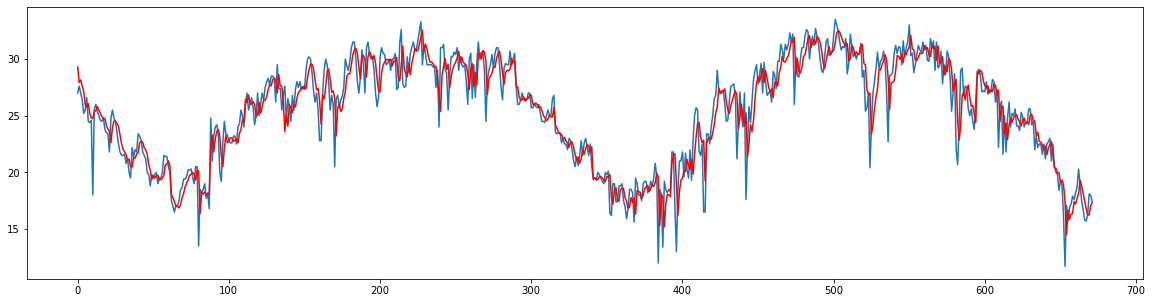

In [14]:
plt.figure(figsize=(20,5))
plt.plot(y_test)
plt.plot(pred, "r")

In [15]:
comp = pd.DataFrame({"Actual": y_test.ravel(), "pred": pred.ravel()})
comp.to_csv("Datasets/MaxPrediction.csv")

In [16]:
print(f"w: {w.shape}, b : {b}")

w: (10, 1), b : 0.032379657374276255


In [17]:
value =[25,24,24,23,23,11,14,13,11,10]
len(value)

10

In [40]:
max_temp = lin_reg.predict(value)
max_temp[0]

24.46045257533375

In [19]:
#x_test.to_csv("Datasets/x_test")
#y_test = pd.DataFrame({"y_test"})

In [20]:
import joblib
file_name = "maxModel.sav"
joblib.dump(lin_reg, file_name)

['maxModel.sav']

In [21]:
maxModel = joblib.load("maxModel.sav")

In [22]:
#pred = maxModel.predict(value)
#pred

In [27]:
comp.iloc[1]

Actual    27.600000
pred      27.937512
Name: 1, dtype: float64

In [32]:
x,y = comp.iloc[1]

27.937512490369134

In [33]:
x

27.6

In [36]:
int(y)

27

In [38]:
comp.shape


(672, 2)